## Introdução

Iniciarei uma série sobre métodos númericos, muito em razão de uma matéria que estou tendo na faculdade (Laboratório de métodos numéricos). Então finalidade dos posts é para estudo e também para divulgar alguns métodos numéricos para fora da academia. A referência principal é [A First Course in Numerical Methods](https://doi.org/10.1137/9780898719987)

Antes de começar, vale a pena saber o que são métodos numéricos. Em poucas palavras métodos numéricos, são conjuntos de algoritmos e estruturas de dados para representar o mundo continuo da matemática e da natureza, no mundo discreto do computador. O exemplo clássico é a representação dos $\mathbb{R}$, que podem possuir infinitas casas decimais, no computador, que possui um número finito de recurso (estrutura de dados), além disso, como fazer soma , subtração nessa representação de número (algoritmos). 

Para iniciar vou apresentar o algoritmo "método da bisseção" que encontra 0 de funções de uma variável. 

WARNING: os algoritmos aqui implementados são para efeitos de estudo, em produção use alguma biblioteca que implementa esse tipo de algoritmo, como por exemplo optimize.fsolve do scipy. 


## Métodos da Bisseção

O intuição do algoritmo é simples, parecida a uma busca binária, mas em um intervalo real.

Suponha que há uma $f(x)$ continua no intervalo $[a, b]$ de tal forma que $f(a) . f(b) < 0$ pelo teorema do valor intermediário de cálculo, há uma raiz $\overline{x} \in [a, b]$. 

Um exemplo para esclarecer: seja $f(x)=sen(x)$ e os pontos $a = \frac{2\pi}{3}$ e  $b = \frac{7\pi}{6}$ como $f(a).f(b) = sen(a).sen(b) < 0$, logo há um zero de função nesse intervalo.

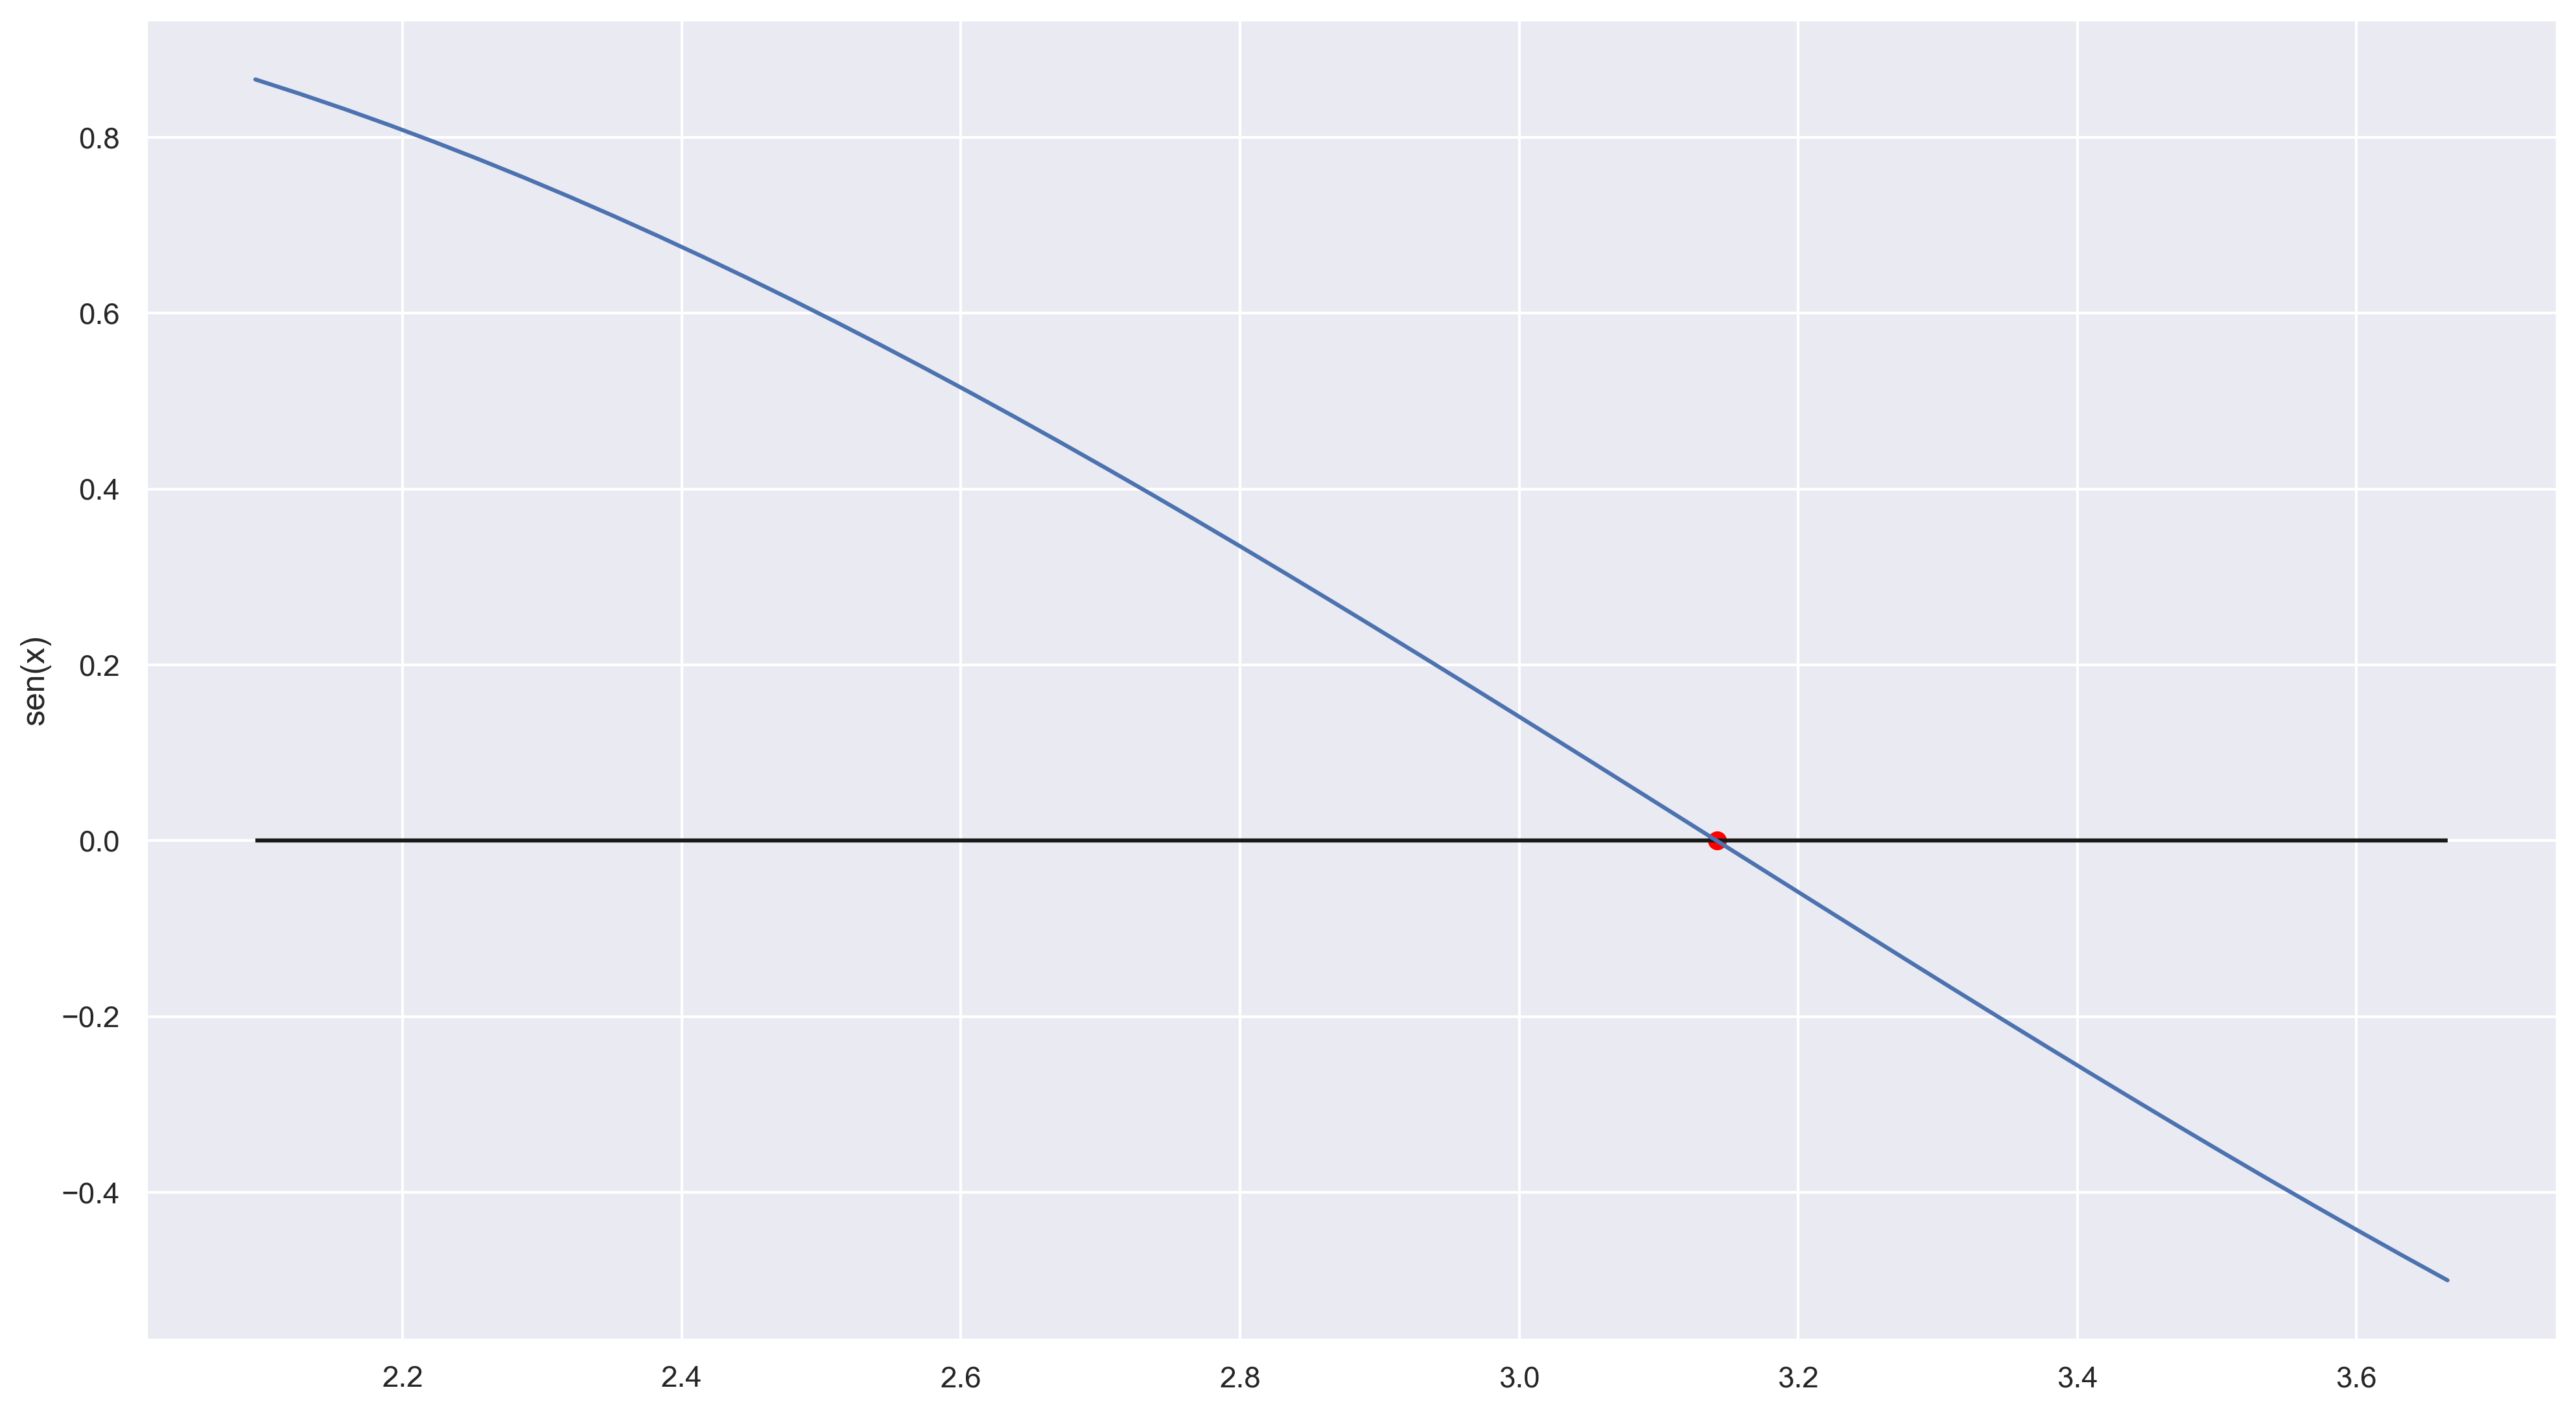

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = [16.0, 9.0]
sns.set()

a = 2 * np.pi / 3
b = 7 * np.pi / 6
x = np.linspace(a, b)
y = np.sin(x)

plt.plot(x,y)
plt.scatter(np.pi, np.sin(np.pi), c="red")
plt.hlines(y=0, xmin=a, xmax=b)
plt.ylabel("sen(x)")
plt.show()

Por inspeção, vemos claramente que há uma raiz e seu valor analitico é $x = \pi$. 

Então, vamos usar o resultado acima para construir um algoritmo. 

- Tome $ p = \frac{a + b}{2}$ (esse sera o ponto intermediário do intervalo $[a, b]$).
- Se $f(a).f(p) < 0$, então b = p, caso contrário a = p.

Como primeiro critério de parada do algoritmo, vou usar $|f(p) - 0| < FTOL$ onde FTOL é uma tolerância de erro se pode cometer. Mas ai surge uma pequena problemática, para esse critério funcionar é necessario que $f(x)$ chege próximo mais próximo de 0 a cada iteração, caso contrário não é verdade que o critério funciona e pode entrar em loop infinito.

Uma intuição do porque isso acontece é o seguinte, do teorema do valor intermidário sabemos que existe um 0 no intervalo $[a,b]$, como o intervalo $[a,p]$ ou $[p,b]$ tem a metade do tamanho do intervalo anterior, a cada iteração estamos chegando mais perto da solução, pois o intervalo que a contém esta ficando menor. (quantas vezes a palavra intervalo rs)

Implementando algoritmo com o exemplo anterior, temos:

Quantidade de interação até convergir: 50
Erro de aproximação da função: 3.216245299353273e-16
Erro do x: 4.440892098500626e-16
Resultado encontrado: 3.1415926535897936
Resultado esperado: 3.141592653589793


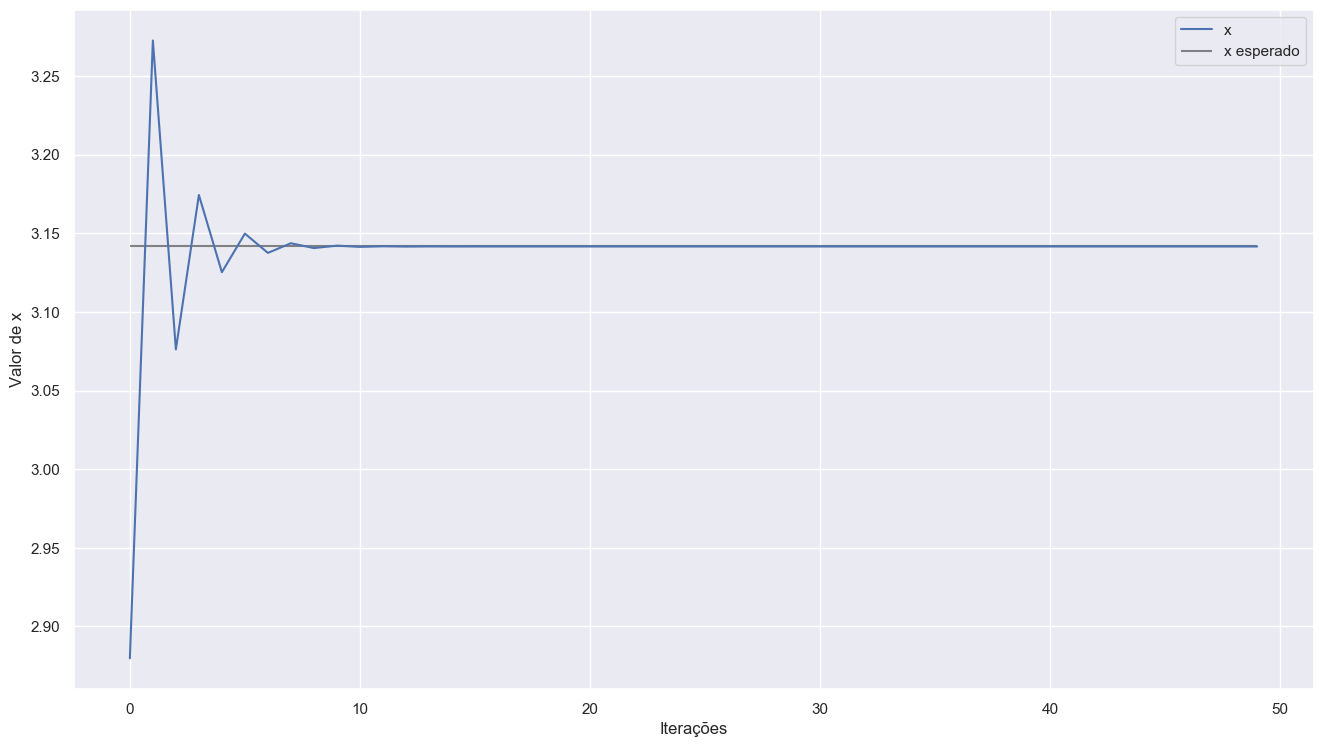

In [12]:
a_alg = a
b_alg = b
FTOL = 1e-15

p = (a_alg+b_alg)/2
fp = np.sin(p)
qtd_itr = 1
ps_encontrados = [p]

while np.abs(fp) > FTOL:
    if np.sin(a_alg) * fp < 0: b_alg = p
    else: a_alg = p
    
    qtd_itr = qtd_itr + 1
    p = (a_alg + b_alg) / 2
    ps_encontrados.append(p)
    fp = np.sin(p)
    
print("Quantidade de interação até convergir:", qtd_itr)
print("Erro de aproximação da função:", np.abs(fp))
print("Erro do x:", np.abs(p - np.pi))
print("Resultado encontrado:", p)
print("Resultado esperado:", np.pi)

plt.plot(np.arange(qtd_itr), ps_encontrados, label="x")
plt.hlines(y=np.pi, xmin=0, xmax=qtd_itr-1, alpha=0.5, label="x esperado")
plt.xlabel("Iterações")
plt.ylabel("Valor de x")
plt.legend()
plt.show()

Veja que com esse algoritmo cometemos um erro da ordem de $10^{-16}$, e o x encontrado é praticamente igual a $\pi$ em aproximadamente 50 iterações. Porém algumas vezes não estamos interssados no quão perto o valor da função esta de 0 e sim o quão perto a resposta encontrada esta da verdadeira resposta, pois podemos ter tolerâncias diferentes.

Para isso, seja $x_{n}$ o $\overline{x}$ na n-ésima iteração, agora que não queremos controlar o erro do valor da função, mas sim o erro

$$\begin{equation}\label{eq1}\tag{1} |x_{n} - x| \leq ATOL \end{equation}$$ 

onde $ATOL$ é a tolerância de erro.

Do algoritmo temos que

$$\begin{equation}\label{eq2}\tag{2} |x_{n} - x| \leq \frac{a + b}{2}2^{-n}\end{equation}$$

A intuição dessa inequeção é a seguinte: a nossa soluação sempre estará no intervalo $[a, p]$ que possui tamanho

$$\begin{equation}\label{eq3}\tag{3} p-a = \frac{b+a}{2} - a = \frac{b-a}{2}\end{equation}$$

portanto a cada iteração, nos diminuimos o intervalo em que a solução esta pela metade, similar no caso $[p, b]$.

De (\ref{eq1}) e (\ref{eq2}), queremos que:

$$
\frac{a + b}{2}2^{-n} \leq ATOL
$$

Multiplicando ambos os lados por $\frac{2^{n}}{ATOL}$

$$
\frac{a + b}{2ATOL} \leq 2^{n}
$$

Tirando o $\log_{2}$


$$
\log_{2} \frac{a + b}{2ATOL} \leq n
$$

portanto o número de iterações até a convergência

$$
n = \lceil\log_{2} \frac{a + b}{2ATOL}\rceil
$$

Voltando ao exemplo, supondo que queremos aceitamos um erro da ordem de $10^{-3}$, basta fazer:

Número de iterações: 12
Erro absoluto da resposta: 0.0001278317323230027
x encontrado: 3.141720485322116
x esperado: 3.141592653589793
Erro de f(x) 0.00012783173197473155


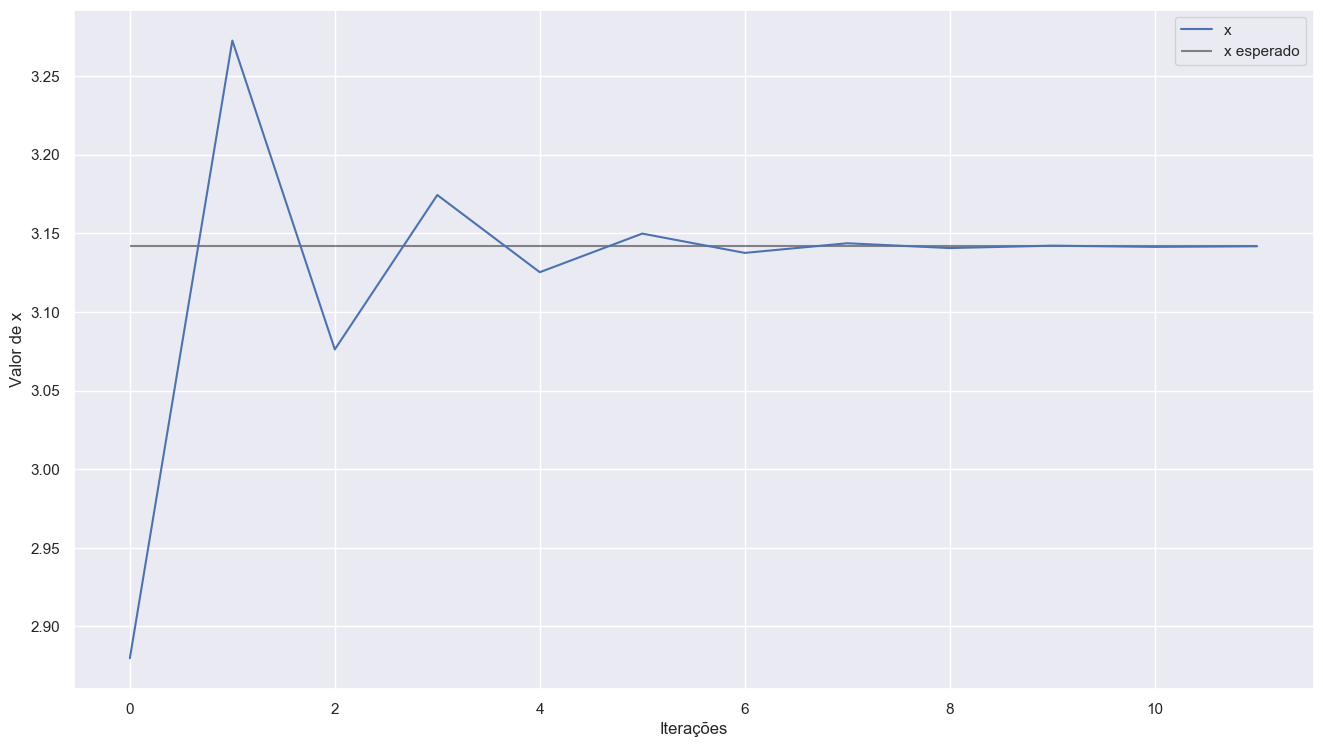

In [13]:
ATOL = 1e-3
n = np.ceil(np.log2((a+b)/(2*ATOL)))
a_alg = a
b_alg = b
ps_encontrados = []

for _ in range(int(n)):
    p = (a_alg + b_alg) / 2
    ps_encontrados.append(p)
    fp = np.sin(p)
    
    if np.sin(a_alg) * fp < 0: b_alg = p
    else: a_alg = p   

print("Número de iterações:", int(n))
print("Erro absoluto da resposta:", np.abs(np.pi - p))
print("x encontrado:", p)
print("x esperado:", np.pi)
print("Erro de f(x)", np.abs(np.sin(p)))

plt.plot(np.arange(n), ps_encontrados, label="x")
plt.hlines(y=np.pi, xmin=0, xmax=n-1, alpha=0.5, label="x esperado")
plt.xlabel("Iterações")
plt.ylabel("Valor de x")
plt.legend()
plt.show()

Veja que foram necessária 12 iterações para encontrar um $\overline{x}$ tal que o erro fosse menor que $10^{-3}$.

## Conclusão

Aqui foram mostrado dois critérios de parada para o algoritmo da bisseção, e sua implementação em python usando a biblioteca numpy. Ainda que simples esse algoritmo para uma variável, ele é bom para contruir uma intuição do que acontece e também possui poucos pré-requisitos sobre $f(x)$, apenas que seja continua no intervalo $[a,b]$ tal que $f(a).f(b) < 0 $. Aos poucos iremos mostrando algoritmos mais complexos que lidam com mais váriaveis.

Por fim a implementação da função bissecao em python é:

In [14]:
def bissecao(f, a, b, ATOL):
    n = np.ceil(np.log2((a+b)/(2*ATOL)))
    a_alg = a
    b_alg = b
    
    for _ in range(int(n)):
        p = (a_alg + b_alg) / 2
        fp = f(p)
        
        if f(a_alg) * fp < 0: b_alg = p
        else: a_alg = p   
    
    return p

bissecao(np.sin, 2 * np.pi / 3, 7 * np.pi / 6, 1e-8)

3.1415926526145146